In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path= '/content/drive/MyDrive/dataset/genshin.csv'
df= pd.read_csv(path)
df.head()

,character_id,playable,rarity,vision,region,weapon_type,hp_90_90,atk_90_90,def_90_90,hp_80_90,...,def_40_40,hp_20_40,atk_20_40,def_20_40,hp_20_20,atk_20_20,def_20_20,hp_1_20,atk_1_20,def_1_20
0,1,1,5,1,1,1,13226,251,876,12296,...,352,3554,68,235,2671,51,177,1030,20,68
1,2,1,5,2,0,2,10899,234,676,10133,...,272,2928,63,182,2201,47,137,848,18,53
2,3,1,4,3,1,2,9461,223,601,8806,...,250,2630,62,167,2038,48,129,793,19,50
3,4,1,5,1,2,3,12858,227,959,11954,...,386,3455,61,258,2597,46,194,1001,18,75
4,5,1,4,4,1,4,9787,159,669,9110,...,279,2721,44,186,2108,34,144,821,13,56


 **Construction of the features dataframe for the regression model**

In [22]:
columns= ['character_id', 'playable', 'vision', 'region', 'weapon_type',
       'hp_90_90', 'atk_90_90', 'def_90_90', 'hp_80_90', 'atk_80_90',
       'def_80_90', 'hp_80_80', 'atk_80_80', 'def_80_80', 'hp_70_80',
       'atk_70_80', 'def_70_80', 'hp_70_70', 'atk_70_70', 'def_70_70',
       'hp_60_70', 'atk_60_70', 'def_60_70', 'hp_60_60', 'atk_60_60',
       'def_60_60', 'hp_50_60', 'atk_50_60', 'def_50_60', 'hp_50_50',
       'atk_50_50', 'def_50_50', 'hp_40_50', 'atk_40_50', 'def_40_50',
       'hp_40_40', 'atk_40_40', 'def_40_40', 'hp_20_40', 'atk_20_40',
       'def_20_40', 'hp_20_20', 'atk_20_20', 'def_20_20', 'hp_1_20',
       'atk_1_20', 'def_1_20']

data_x = df[columns].copy()
data_y = df['rarity'].copy()

In [23]:
data= PolynomialFeatures(2,include_bias=False)
data_x= data.fit_transform(data_x)

**Train/Test data split**

In [24]:
train_x, test_x,train_y,test_y = train_test_split( data_x, data_y, test_size=0.2, shuffle=True, random_state=42)
display((train_x.shape,train_y.shape))

((41, 1175), (41,))

In [25]:
x = df[columns].copy()
x = data.fit_transform(x)
y = np.array(df['rarity'].copy()).flatten()
regression = linear_model.LinearRegression()
regression.fit(train_x, train_y)
pred = regression.predict(x)
predicted = np.round(regression.predict(x)).astype(int)

In [27]:
def get_rarity(df,columns):
    char= df.sample(1)
    charx = char[columns].copy()
    charx= data.fit_transform(charx)
    chary = np.array(char['rarity'].copy())
    return charx,chary

**Predicting the overall rarity**

In [28]:
charx,chary = get_rarity(df, columns)
estimated = regression.predict(charx)
print('Actual value=',int(chary), 'Predicted value=', int(np.round(estimated)))

Actual value= 4 Predicted value= 4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


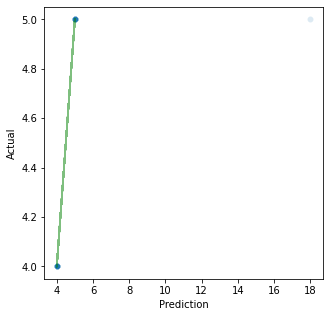

In [29]:
plt.figure(figsize=(5,5))
sb.scatterplot(predicted, y, alpha=0.15)
plt.plot(y, y, color='g', alpha=0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual');